In [207]:
import pandas as pd

dT = 0.1  # 10 hz => 100ms

SIGMA_ALPHA_VALUE = 0.4
SIGMA_BETA_VALUE = 2.0
SIGMA_KAPPA_VALUE = 1.0

Q_VARIANCE_VALUE = 1


# file_path = 'con_vel_basic_log.csv'
# file_path = 'con_vel_beacon_freq_log.csv'
# file_path = 'con_vel_beacon_flag_AND_freq_log.csv'

# file_path = 'dyn_acc_basic_log.csv'
# file_path = 'dyn_acc_beacon_freq_log.csv'
file_path = 'dyn_acc_beacon_flag_AND_freq_log.csv'

# Einlesen der Datei

df_head = pd.read_csv(file_path, sep='\t', header=None, nrows=1, names=[

    'Zeit_Index',
    'Beacon0_Pos_X', 'Beacon0_Pos_Y',
    'Beacon1_Pos_X', 'Beacon1_Pos_Y',
    'Beacon2_Pos_X', 'Beacon2_Pos_Y',
    'GT_StartPos_X_Boat', 'GT_StartPos_Y_Boat' 
    
])


# Erst ab 2 Zeile lesen
df = pd.read_csv(file_path, sep='\t', header=None, skiprows=1, names=[

    'Zeit_Index',
    'X_GT', 'Y_GT',
    'Heading_GT', 'Heading', 'Heading_STD',
    'angle_GT_B0', 'angleDistorted_B0', 'STD_angle_B0',
    'angle_GT_B1', 'angleDistorted_B1', 'STD_angle_B1',
    'angle_GT_B2', 'angleDistorted_B2', 'STD_angle_B2',
    'Richtung_GT_X_B0', 'Richtung_GT_Y_B0',
    'Richtung_X_B0', 'Richtung_Y_B0', 'STD_Richtung_B0',
    'Richtung_GT_X_B1', 'Richtung_GT_Y_B1',
    'Richtung_X_B1', 'Richtung_Y_B1', 'STD_Richtung_B1',
    'Richtung_GT_X_B2', 'Richtung_GT_Y_B2',
    'Richtung_X_B2', 'Richtung_Y_B2', 'STD_Richtung_B2',
    'Entfernung_B0', 'EntfernungDistorted_B0', 'STD_Entfernung_B0',
    'Entfernung_B1', 'EntfernungDistorted_B1', 'STD_Entfernung_B1',
    'Entfernung_B2', 'EntfernungDistorted_B2', 'STD_Entfernung_B2'

])


#df_head

#print(df.head())
df

,Zeit_Index,X_GT,Y_GT,Heading_GT,Heading,Heading_STD,angle_GT_B0,angleDistorted_B0,STD_angle_B0,angle_GT_B1,...,STD_Richtung_B2,Entfernung_B0,EntfernungDistorted_B0,STD_Entfernung_B0,Entfernung_B1,EntfernungDistorted_B1,STD_Entfernung_B1,Entfernung_B2,EntfernungDistorted_B2,STD_Entfernung_B2
0,0,0.000000,-14.82000,0.000000,-1.015518,1,153.71300,152.12960,1,111.77290,...,1,33.46091,32.748310,1,48.26223,47.85118,1,33.46091,31.80107,1
1,1,0.000015,-14.62000,0.019782,0.807247,1,154.03650,153.22100,1,111.87690,...,1,33.37282,34.488570,1,48.07655,52.00607,90,33.37280,32.65881,1
2,2,0.000109,-14.38000,0.019782,-0.872562,1,154.41400,188.47230,90,111.99000,...,90,33.26847,-17.321290,90,47.85393,-48.24703,90,33.26827,96.02724,90
3,3,0.000192,-14.18000,0.019782,0.738071,1,154.72540,151.88330,90,112.07990,...,90,33.18259,-3.782364,90,47.66854,75.84459,90,33.18224,-69.18185,90
4,4,0.000278,-13.98000,0.019782,-0.750152,1,155.03980,154.11900,1,112.17190,...,1,33.09769,32.029870,1,47.48326,187.01880,90,33.09719,33.23228,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,161.792300,86.91003,66.810550,66.725330,1,-88.81194,-115.53540,90,-95.61602,...,90,210.56500,198.489000,90,188.48890,186.37730,90,157.86880,123.66220,90
391,391,162.711500,87.30379,66.811760,67.377820,1,-88.81637,-55.78291,90,-95.58524,...,90,211.56480,273.501500,90,189.48410,99.86003,90,158.85300,264.07780,90
392,392,163.630700,87.69754,66.808200,67.268880,1,-88.82548,-90.32108,1,-95.55950,...,1,212.56460,211.589500,1,190.47940,328.06160,90,159.83750,157.92080,1
393,393,164.549900,88.09129,66.811180,66.631300,1,-88.82802,-41.15725,90,-95.52756,...,90,213.56430,286.277900,90,191.47470,78.18900,90,160.82210,74.70576,90


In [208]:
"""
UKF mit Winkel.
"""

# Imports
import numpy as np
import matplotlib.pyplot as plt
from filterpy.common import Q_discrete_white_noise
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.kalman import MerweScaledSigmaPoints
import math
from math import sin as sin
from math import cos as cos
import time
import pandas as pd


# --- ---- --- --- ---- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

# Konfigurationsvariablen

BEACON_POSITIONS = [
    np.array([df_head['Beacon0_Pos_X'].values[0],
             df_head['Beacon0_Pos_Y'].values[0]]),
    np.array([df_head['Beacon1_Pos_X'].values[0],
             df_head['Beacon1_Pos_Y'].values[0]]),
    np.array([df_head['Beacon2_Pos_X'].values[0],
             df_head['Beacon2_Pos_Y'].values[0]])
]


# --- ---- --- --- ---- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---


def f_x(state, dt):
    """
    Zustandsübergangsfunktion.
    Da die Geschwindigkeit konstant ist und der Zustand nur die Position beinhaltet,
    hat diese Funktion einfach die Geschwindigkeit zur Position hinzugefügt.
    """

    x, y, vx, vy, ax, ay = state

    # Update position with current velocity and acceleration
    new_x = x + vx * dt + (ax * dt ** 2) / 2.0
    new_y = y + vy * dt + (ay * dt ** 2) / 2.0

    # Update velocity with current acceleration
    new_vx = vx + ax * dt
    new_vy = vy + ay * dt

    # Speed stays constant (no acceleration yet)
    new_ax = ax
    new_ay = ay

    return np.array([new_x, new_y, new_vx, new_vy, new_ax, new_ay])


def normalize_angle_deg(angle):
    """Normalisiert Winkel in Grad (so dass er im Bereich von -180bis 180 Grad liegt)"""

    # Normalisierung des Winkels in Grad (in Bereich von -180 bis 180 Grad)
    # angle = (angle + 180) % 360 - 180

    # angle_rad = deg_to_rad(angle)
    # rad = normalize_angle_rad(angle_rad)
    
    # return rad_to_degree(rad)

    # Winkel in BEreich von 0 bis 2pi (360) halten
    angle = angle % (2 * 180)

    # Wenn Winkel größer als pi (180) ist -> Anpassung um diesen in -180 bis 180 zu bringen
    if angle > 180:
        angle -= 2 * 180

    # Rückgabe des normalisierten Winkels (aber in Grad)
    # return x * 180 / np.pi
    return angle




def residual_angle(a, b):
    """ 
    Berechnung der Differenz zwischen den zwo Winkeln (zwischen dem geschätzten und gemessenen Winkel)
    Quelle: https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/10-Unscented-Kalman-Filter.ipynb
    """
    # Berechnung der Differenz
    diff = a - b
    

    # Normalisierung der errechneten Winkeldifferenz (für Bereich von -180 bis 180 Grad)

    for i in range(len(diff)):
        diff[i] = normalize_angle_deg(diff[i])


    return diff


def normalize_angle_rad(x):
    """ Normalisiert einen Winkel (in Radiant) für Bereich -pi (-180) bis pi (180)."""

    # Winkel in BEreich von 0 bis 2pi (360) halten
    x = x % (2 * np.pi)

    # Wenn Winkel größer als pi (180) ist -> Anpassung um diesen in -180 bis 180 zu bringen
    if x > np.pi:
        x -= 2 * np.pi

    # Rückgabe des normalisierten Winkels (aber in Grad)
    # return x * 180 / np.pi
    return x


def rad_to_degree(x):
    return x * 180 / np.pi


def deg_to_rad(x):
    return x * np.pi / 180

def h_x(state):
    """
    Messfunktion.
    """

    # Position, Geschwindigkeit des Schiffs aus dem Zustand
    x, y, vx, vy, _, _ = state

    # Messliste
    measure_data = []

    # Richtungsvektor der Schiffsausrichtung
    hdg = np.array([vx, vy])

    # Berechnung der Magnitude (Geschwindigkeit)
    mag = np.sqrt(vx * vx + vy * vy)

    # Vermeidung Division durch 0 (der Geschwindigkeit, bspw. initial Zustand)
    if mag == 0:
        mag = 1

    # Normalisierung der Richtung
    hdg = np.array([vx / mag, vy / mag])

    # Rotation um 90 Grad zur Ausrichtung
    hdg = np.array([hdg[1], -hdg[0]])

    # Berechnung des Winkels zur Ausrichtung: y, x
    angleHeading = np.arctan2(hdg[1], hdg[0])

    for beacon_pos in BEACON_POSITIONS:

        # Berechnung der euklidischen Distanz
        # distance = np.sqrt((beacon_pos[0] - x) ** 2 + (beacon_pos[1] - y) ** 2)

        # Berechnung des Winkels (in Radiant) -- aktuellen Position und dem Beacon
        angle = np.arctan2(beacon_pos[1] - y, beacon_pos[0] - x)

        # Anpassung basierend zur Ausrichtung des Schiffs
        angle -= angleHeading

        # Normalisierung des Winkels
        normalized_angle = rad_to_degree(normalize_angle_rad(angle))

        # Speichern des normalisierten Winkels (für jeden Beacon)
        measure_data.append(normalized_angle)

    # Rückgabe der Winkel (Array)
    return np.array(measure_data)


# TODO: erzeuge sigmas korrekt: https://filterpy.readthedocs.io/en/latest/kalman/UnscentedKalmanFilter.html#filterpy.kalman.MerweScaledSigmaPoints
# def sigma_subtract(a, b):
#     # print(f"A: {a} \t B: {b}")
#     diff = a - b
#     for i in range(len(diff)):
#         diff[i] = normalize_angle_deg(diff[i])
#     return diff

def init_ukf():
    """
    Initialisierung vom UKF.
    """

    sigmas = MerweScaledSigmaPoints(n=6, alpha=SIGMA_ALPHA_VALUE, beta=SIGMA_BETA_VALUE, kappa=SIGMA_KAPPA_VALUE)
    # sigmas = MerweScaledSigmaPoints(
        # n=6, alpha=SIGMA_ALPHA_VALUE, beta=SIGMA_BETA_VALUE, kappa=SIGMA_KAPPA_VALUE, subtract=sigma_subtract)

    # Dimension z ist 3 (da wir drei verzerrte Winkel als Messungen haben)
    ukf = UKF(dim_x=6, dim_z=3, dt=dT, fx=f_x, hx=h_x, points=sigmas,
              residual_x=np.subtract, residual_z=residual_angle)

    # Initialzustand aus dem ersten Logeintrag holen
    init_state = np.array([
        df['X_GT'].values[0], df['Y_GT'].values[0],  # x, y
        0, 0,  # vx, vy
        0, 0   # ax, ay
    ])

    ukf.x = init_state

    ukf.Q = Q_discrete_white_noise(
        dim=2, dt=dT, var=Q_VARIANCE_VALUE, block_size=3, order_by_dim=False)

    return ukf


if __name__ == "__main__":

    # Speichere geschätzten Zustände und Kovarianzmatrizen
    uxs = []
    uPs = []

    # Init UKF.
    ukf = init_ukf()

    # Initial Zustand fix im Code vs. aus dem ersten Log
    # ukf.x = initial_state  #  passiert bereits in init_ukf-Funktion

    # Iteriere durch jede Zeile im Df
    for index, row in df.iterrows():

        # Standardabweichungen für die aktuelle Messung aus Spalte holen
        # Wichtig: Nochmal Division-Faktor anschauen
        std_b0 = row['STD_angle_B0']
        std_b1 = row['STD_angle_B1']
        std_b2 = row['STD_angle_B2']

        # Zeige Std zwecks Korrektheit
        # print(std_b0, std_b1, std_b2)

        # Setze die Rauschmatrix R basierend auf den extrahierten Standardabweichungen immer neu
        ukf.R = np.diag([std_b0 ** 2, std_b1 ** 2, std_b2 ** 2])

        # Prüfe ob Std. in R-Matrix gesetzt werden
        # print(ukf.R)

        # Hole den aktuellen Messvektor z
        z = np.array([
            row['angleDistorted_B0'],
            row['angleDistorted_B1'],
            row['angleDistorted_B2'],
        ])

        # Check ob Daten korrekt eingelesen sind
        # print(z)

        # Vorhersage und Update mit dem aktuellen Messvektor
        ukf.predict()
        ukf.update(z)

        uxs.append(ukf.x.copy())
        uPs.append(ukf.P.copy())

    # Gefilterte Zustände [x, y, vx, vy, ax, ay]
    uxs = np.array(uxs)

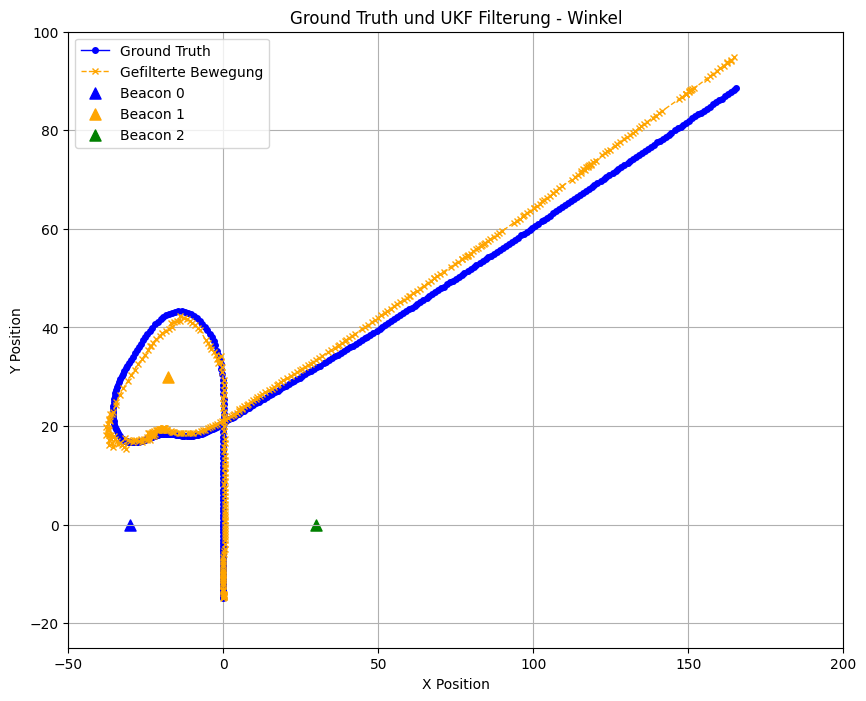

In [209]:
# Wichtig: Scatter statt Plot verwenden falls keine Verbindungslinien gezeichnet werden sollen!

def plotte_gt_and_estimate(gt_x, gt_y, x_esti, y_esti, beacons, title='Ground Truth und UKF Filterung - Winkel'):
    
    plt.figure(figsize=(10, 8))
    
    # Ground Truth und geschätzte Position plotten
    plt.plot(gt_x, gt_y, 'b-', label='Ground Truth', marker='o', markersize=4, linewidth=1)
    plt.plot(x_esti, y_esti, label='Gefilterte Bewegung', marker='x', markersize=4, linewidth=1, linestyle='--', color='orange')
    
    # Farben Beacons
    beacon_colors = ['blue', 'orange', 'green']
    
    # Beacons
    for i, beacon in enumerate(beacons):
        plt.scatter(beacon[0], beacon[1], s=64, color=beacon_colors[i], label=f'Beacon {i}', marker='^')

    
    plt.title(title)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    
    plt.legend()

    plt.xlim(-50, 200)
    plt.ylim(-25, 100)

    
    plt.grid(True)
    plt.show()


# BEACON_POSITIONS muss als Liste von [x, y] Koordinaten definiert sein
beacons_xy = [[beacon[0], beacon[1]] for beacon in BEACON_POSITIONS]


ux_val = [s[0] for s in uxs]
uy_val = [s[1] for s in uxs]


gt_x = df['X_GT'].tolist()
gt_y = df['Y_GT'].tolist()

plotte_gt_and_estimate(gt_x, gt_y, ux_val, uy_val, beacons_xy)

In [210]:
## Auswertungsfunktionen ##
## ==> RMSE für Strecke  
def calc_rmse(uxs, gt):
    """
    Berechne den Root-Square-Mean-Error zwischen den UKF-Schätzungen und dem GT.
    """

    if len(uxs) == 0:
        raise ValueError("Liste der Schätzung ist leer!")
    
    if len(uxs) != len(gt):
        raise ValueError("Schätzungen sind nicht gleich so lang wie GT.")

    # Position, erste beiden Spalten
    uxs_posi = uxs[:, :2]

    rmse = np.sqrt(((uxs_posi - gt) ** 2).mean(axis=0))

    return rmse


gt= df[['X_GT', 'Y_GT']].values

rmse = calc_rmse(uxs, gt)

print("RMSE (für x und y) ist:", rmse)

RMSE (für x und y) ist: [1.74915748 2.90704765]


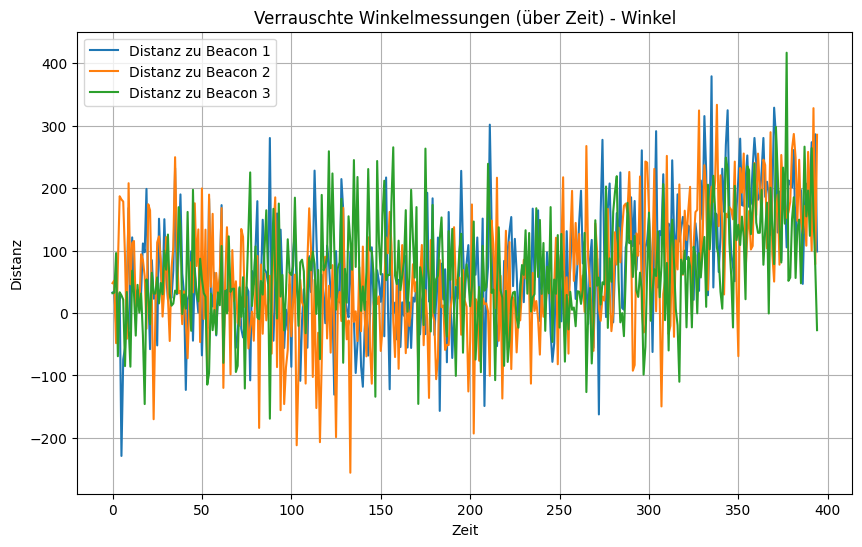

In [211]:

def plotte_noisy_distances(time_steps, noisy_distances):
    
    plt.figure(figsize=(10, 6))
    
    for i in range(noisy_distances.shape[1]):
        plt.plot(time_steps, noisy_distances[:, i], label=f'Distanz zu Beacon {i+1}')
    
    plt.title('Verrauschte Winkelmessungen (über Zeit) - Winkel')
    plt.xlabel('Zeit')
    plt.ylabel('Distanz')
    
    plt.legend()
    
    plt.grid(True)
    plt.show()



# df enthältverrauschten Distanzmessungen zu den Beacons in separaten Spalten
# dh.Zeit relativ zum Index der Datei
time_steps = df.index
noisy_distances = df[['EntfernungDistorted_B0', 'EntfernungDistorted_B1', 'EntfernungDistorted_B2']].values

plotte_noisy_distances(time_steps, noisy_distances)

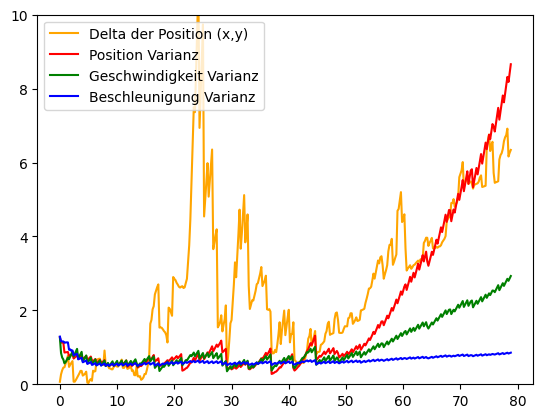

In [212]:

def calc_delta(uxs, gt):
    """
    Berechne Delta von geschätzten und GT (wahren Werten)
    """

    if len(uxs) == 0:
        raise ValueError("Liste der Schätzung ist leer!")
    
    if len(uxs) != len(gt):
        raise ValueError("Schätzungen sind nicht gleich so lang wie GT.")


    uxs_p = uxs[:, :2] # Positionen
    uxs_v = uxs[:, 2:4] # Geschwindigkeiten
    uxs_a = uxs[:, 4:6] # Beschleunigungen

    #
    #t = [(2 * i * dT) for i in range(len(uxs_p))]
    #plt.plot(t, delta_p, color = 'green')

    delta_x = (uxs[:, 0:1] - gt[:, 0:1]) 
    delta_y = (uxs[:, 1:2] - gt[:, 1:2])


    delta_p = np.sqrt((delta_x ** 2) + (delta_y ** 2))

    t = [(2 * i * dT) for i in range(len(delta_x))]

    #plt.plot(t, delta_x, color = 'green')
    #plt.plot(t, delta_y, color = 'blue')
    #plt.show()

    # Delta: zwischen geschätzten und Ground Truth (GT) Positionen
    plt.plot(t, delta_p, color = 'orange', label='Delta der Position (x,y)')

    # --- POSI.

    varianz_px = np.array([P[0,0] for P in uPs])
    varianz_py = np.array([P[1,1] for P in uPs])

    varianz_p = np.sqrt(varianz_px + varianz_py)

    plt.plot(t, varianz_p, color = 'red', label='Position Varianz')

    # --- VELO.

    varianz_vx = np.array([P[2,2] for P in uPs])
    varianz_vy = np.array([P[3,3] for P in uPs])

    varianz_v = np.sqrt(varianz_vx + varianz_vy)

    plt.plot(t, varianz_v, color = 'green', label='Geschwindigkeit Varianz')

    # --- ACC.

    varianz_ax = np.array([P[4,4] for P in uPs])
    varianz_ay = np.array([P[5,5] for P in uPs])

    varianz_a = np.sqrt(varianz_ax + varianz_ay)

    plt.plot(t, varianz_a, color = 'blue', label='Beschleunigung Varianz')


    plt.legend()

    #plt.xlim(-1, 61)
    plt.ylim(0, 10)



gt= df[['X_GT', 'Y_GT']].values
calc_delta(uxs, gt)


